#**CIENCIA Y ANALÍTICA DE DATOS - MIGUEL MARINES**
##**<u>Regresión Lineal</u>**
---
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Ciencia_Analitica_Datos"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Se efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
insurance_df.describe(include = 'object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


1b) Búsqueda de valores faltantes.

In [ ]:
insurance_df.isna().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [ ]:
categorical_variables = insurance_df.select_dtypes(include = 'object').columns.tolist()
print('Variables categóricas',categorical_variables)
numerical_variables = insurance_df.select_dtypes(include = ['int', 'float']).columns.tolist()
print('Variables cuantitativas',numerical_variables)

Variables categóricas ['sex', 'smoker', 'region']
Variables cuantitativas ['age', 'bmi', 'children', 'charges']


In [ ]:
insurance_df[numerical_variables].skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [ ]:
insurance_df[numerical_variables].kurtosis()

age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

In [ ]:
def plotNumericalVariables(col, df):
    plt.figure(figsize = (15, 6))
    plt.subplot(1, 2, 1)
    insurance_df_column = df[col];
    mean = insurance_df_column.mean()
    median = insurance_df_column.median()
    mode = insurance_df_column.mode().iloc[0]
    plt.axvline(mean, color = 'red', linestyle = '--', label = f'Mean {mean:.2f}')
    plt.axvline(median, color = 'green', linestyle = '-', label = f'Median {median:.2f}')
    plt.axvline(mode, color = 'blue', linestyle = '-', label = f'Mode {mode:.2f}')
    plt.legend()
    sns.histplot(data = df, x = col, kde = True)
    plt.subplot(1, 2, 2)
    sns.boxplot(data = df, x = col)
    plt.show()

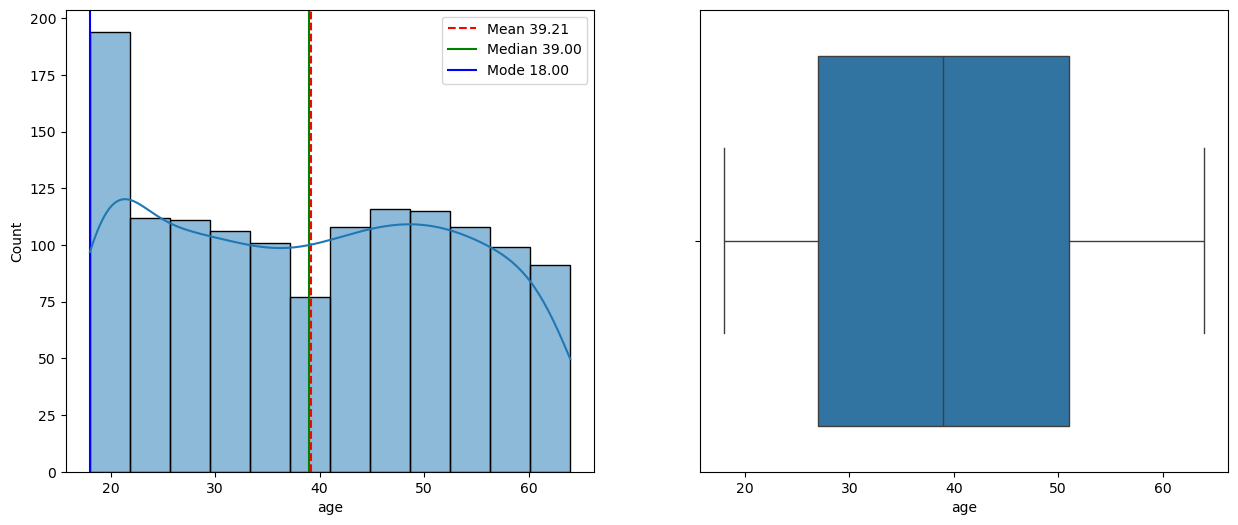

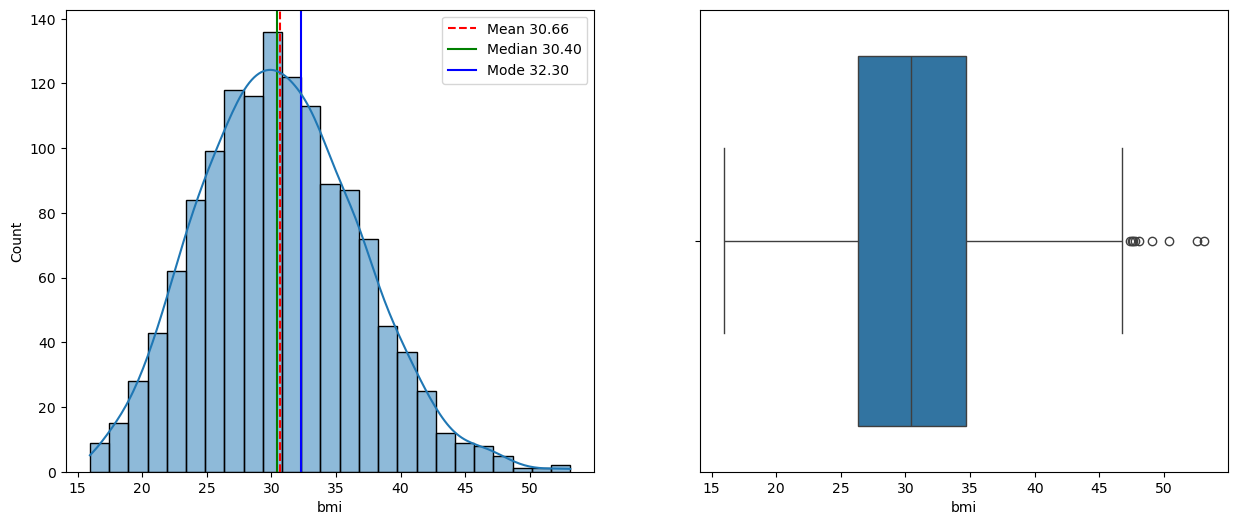

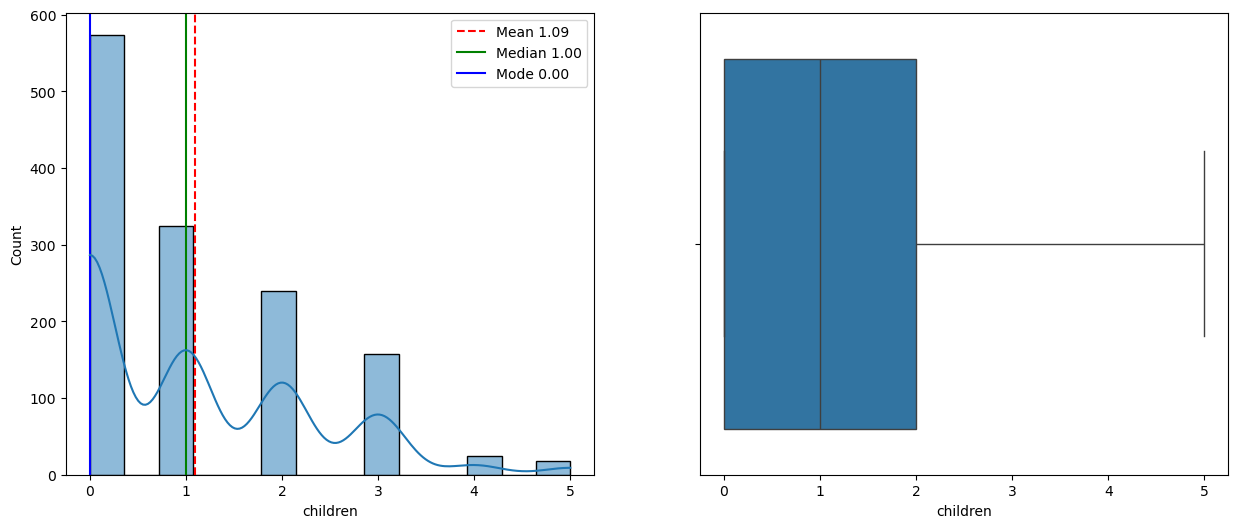

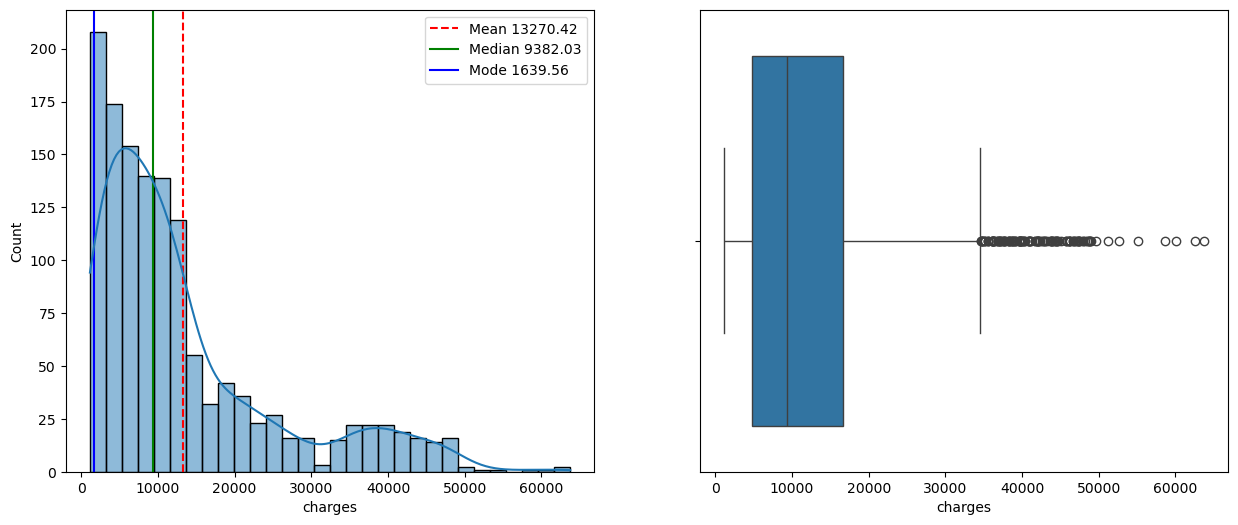

In [ ]:
for numerical_variable in numerical_variables:
    plotNumericalVariables(numerical_variable, insurance_df)

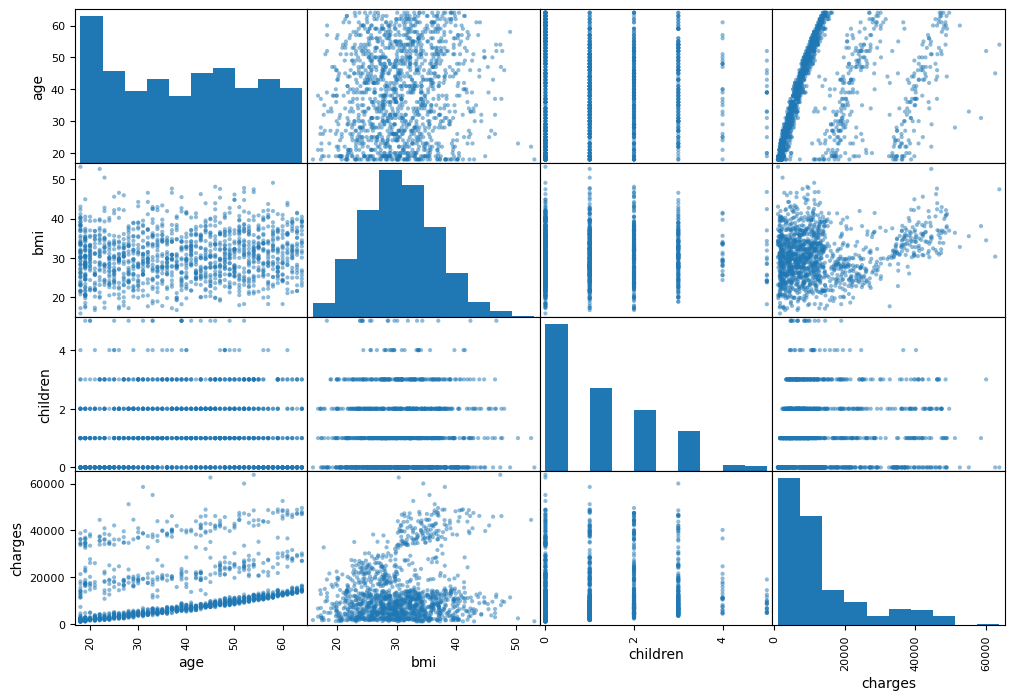

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(insurance_df[numerical_variables], figsize = (12, 8))
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

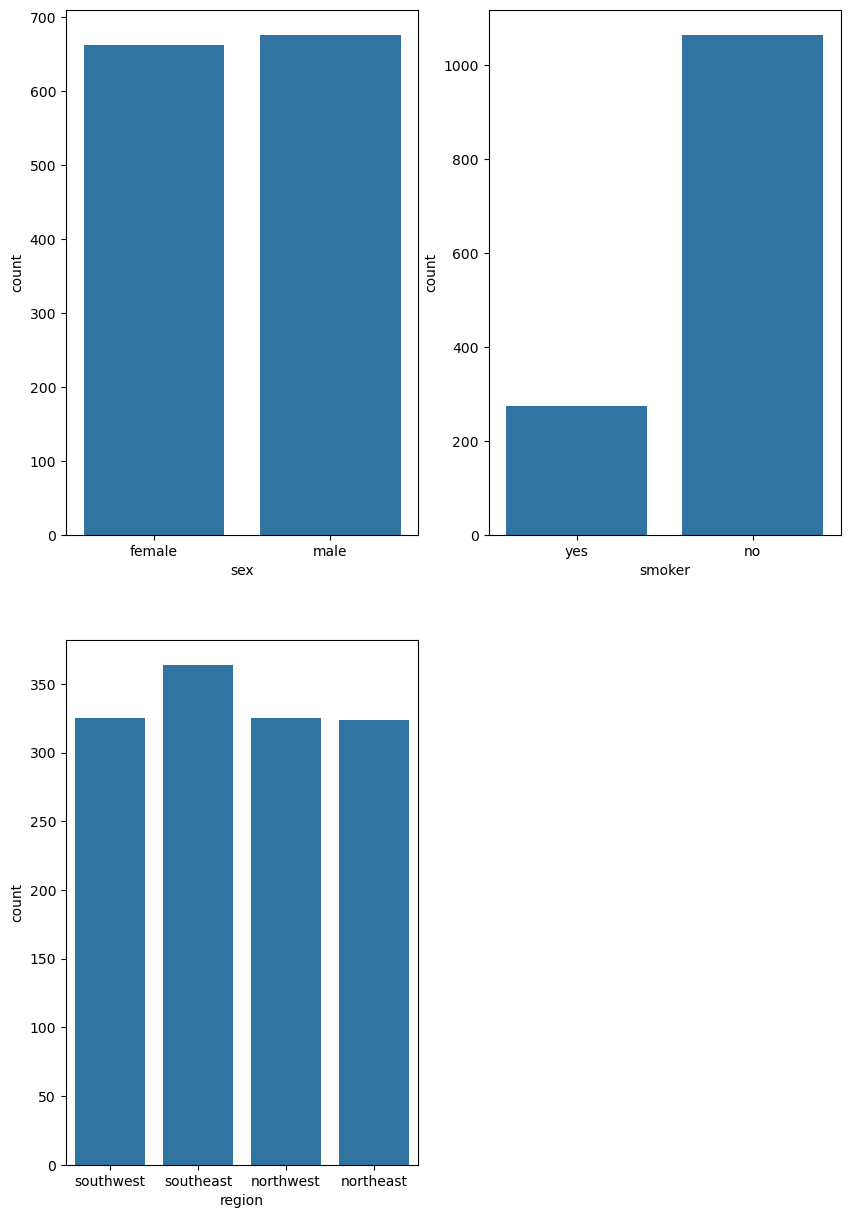

In [ ]:
plt.figure(figsize = (10, 15))
for i, col in enumerate(categorical_variables, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data = insurance_df, x = col)
plt.tight_layout

Para responder los siguientes cuestionamientos, se generan los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Se compara la distribución de la variable `charges` por medio de un boxplot.

El primer cuartil y el segundo cuartil se encuentran ubicados en el mismo costo de los cargos tanto para hombres como para mujeres, sin embargo, el tercer y cuarto cuartil son más elevados para los hombres. Según el gráfico de boxplot, se demuestra que hay una diferencia en las primas según el sexo en el tercer y cuarto cuartil.

<Axes: xlabel='sex', ylabel='charges'>

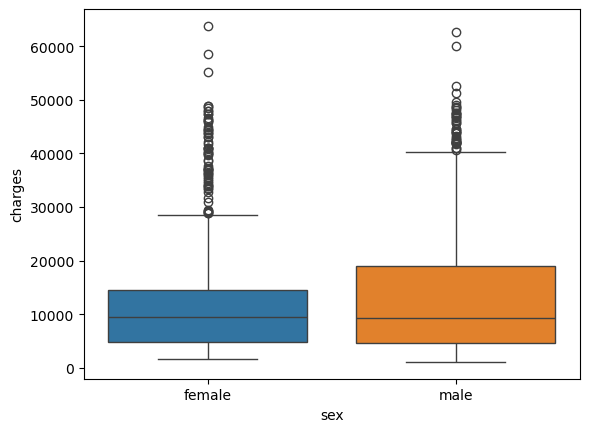

In [ ]:
sns.boxplot(data = insurance_df, x = 'sex', y = 'charges', hue = 'sex')

2b) Se crea un diagrama de dispersión de `charges` versus el `bmi` que incorpora la distinción por las categorías `smoker` y `children` (tip: se utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

Al observar el gráfico se puede sacar la conclusión que las personas que fuman pagan más por su seguro y que la cantidad de hijos realmente no afecta lo que las personas pagan por su seguro.

/Users/alejandrocalderon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


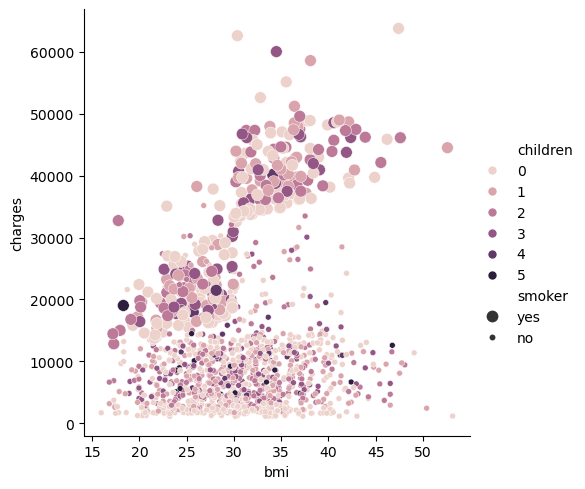

In [ ]:
sns.relplot(data = insurance_df, x = 'bmi', y = 'charges', hue = 'children', size = 'smoker')

2c) Se elabora un mapa de calor que muestre la correlación de las variables numéricas.

<Axes: >

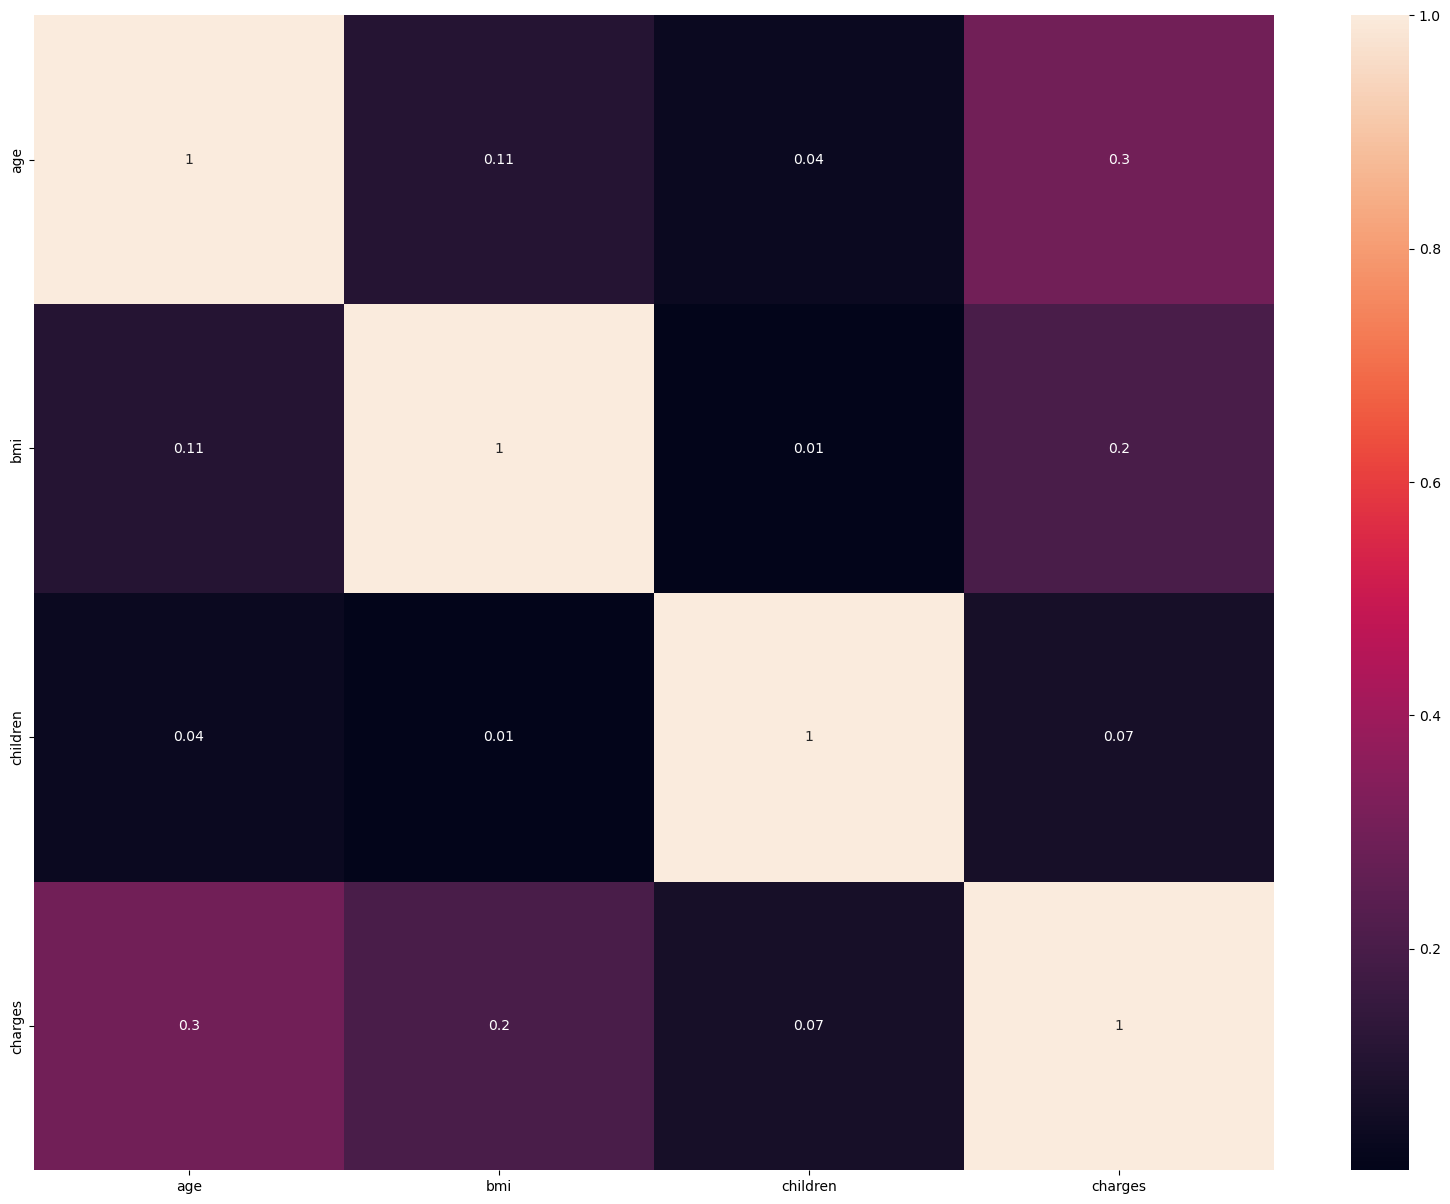

In [ ]:
plt.figure(figsize = (20, 15))
sns.heatmap(round(insurance_df.corr(numeric_only = True), 2), annot = True)

Se obtiene un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

In [ ]:
quantile_25 = insurance_df['charges'].quantile(0.25)
quantile_75 = insurance_df['charges'].quantile(0.75)
iqr = quantile_75 - quantile_25
upper_limit = quantile_75 + 1.5 * iqr
lower_limit = quantile_25 - 1.5 * iqr
charges_df = insurance_df[(insurance_df['charges'] < lower_limit) | (insurance_df['charges'] > upper_limit)]
charges_df

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [ ]:
charges_df[['age', 'bmi']].mean().apply(lambda x: round(x, 2))

age    41.08
bmi    35.56
dtype: float64

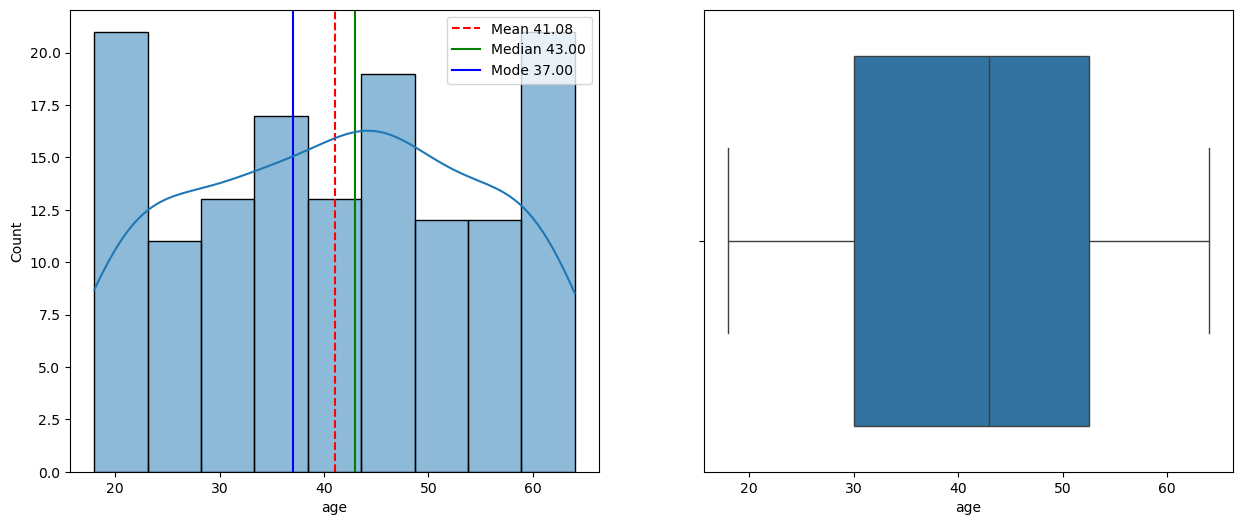

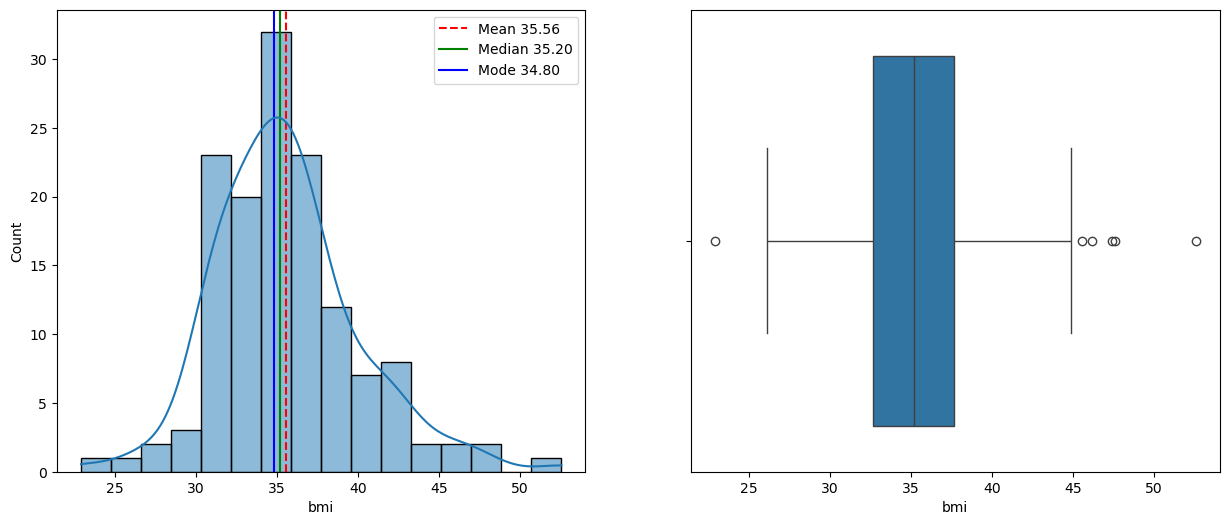

In [ ]:
for numerical_variable in ['age', 'bmi']:
    plotNumericalVariables(numerical_variable, charges_df)

3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [ ]:
rows, colums = charges_df.shape

In [ ]:
gender_df = charges_df[['sex']].groupby(['sex']).value_counts().apply(lambda x: pd.Series({'proportion': round(x / rows * 100, 2)}))
gender_df

,proportion
sex,
female,35.97
male,64.03


<Axes: xlabel='sex', ylabel='proportion'>

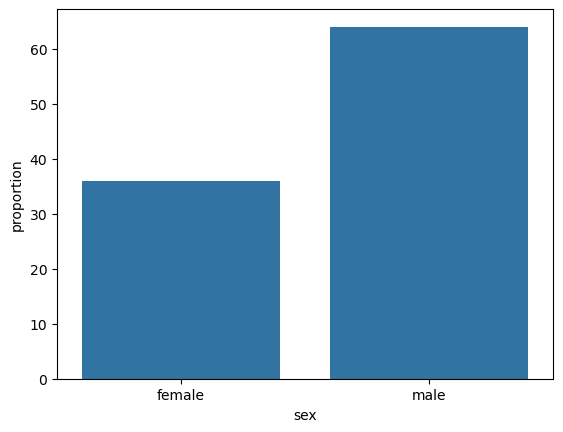

In [ ]:
sns.barplot(data = gender_df, x = 'sex', y = 'proportion')

In [ ]:
smokers_df = charges_df[['smoker']].groupby(['smoker']).value_counts().apply(lambda x: pd.Series({'proportion':round(x/rows * 100, 2)}))
smokers_df

,proportion
smoker,
no,2.16
yes,97.84


<Axes: xlabel='smoker', ylabel='proportion'>

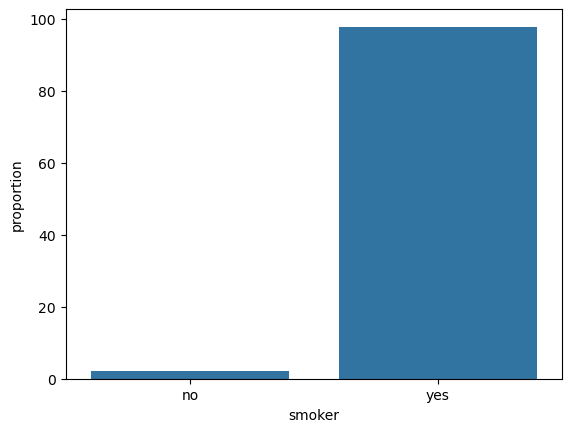

In [ ]:
sns.barplot(data = smokers_df, x = 'smoker', y = 'proportion')

In [ ]:
group_df = charges_df[['sex', 'smoker']].groupby(['sex']).value_counts(normalize = True).mul(100).to_frame()
group_df

proportion
sex    smoker            
female yes           94.0
       no             6.0
male   yes          100.0

<Axes: xlabel='sex', ylabel='proportion'>

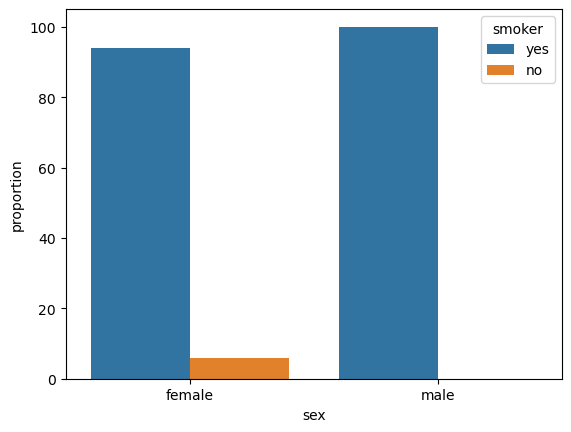

In [ ]:
sns.barplot(data = group_df, x = 'sex', y = 'proportion', hue = 'smoker')

# **Parte 2**. Preprocesamiento

4. Se separa las variables del dataframe: en `X` se colocan los predictores y en `y` la variable de respuesta o salida (`charges`).

In [ ]:
X = insurance_df.iloc[:,0:-1]
y = insurance_df.loc[:, 'charges']

5. Se divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Se analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
(Si)
*   Como ya se tienen separados en `X` e `y` los predictores y la salida, se consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [ ]:
Xtrain

,age,sex,bmi,children,smoker,region
216,53,female,26.600,0,no,northwest
731,53,male,21.400,1,no,southwest
866,18,male,37.290,0,no,southeast
202,60,female,24.035,0,no,northwest
820,45,male,33.700,1,no,southwest
...,...,...,...,...,...,...
715,60,male,28.900,0,no,southwest
905,26,female,29.355,2,no,northeast
1096,51,female,34.960,2,yes,northeast
235,40,female,22.220,2,yes,southeast


In [ ]:
Xtest

,age,sex,bmi,children,smoker,region
559,19,male,35.530,0,no,northwest
1087,57,male,31.540,0,no,northwest
1020,51,male,37.000,0,no,southwest
460,49,female,36.630,3,no,southeast
802,21,male,22.300,1,no,southwest
...,...,...,...,...,...,...
682,39,male,35.300,2,yes,southwest
629,44,female,38.950,0,yes,northwest
893,47,male,38.940,2,yes,southeast
807,19,female,36.575,0,no,northwest


In [ ]:
ytrain

216     10355.64100
731     10065.41300
866      1141.44510
202     13012.20865
820      7445.91800
           ...     
715     12146.97100
905      4564.19145
1096    44641.19740
235     19444.26580
1061    11554.22360
Name: charges, Length: 1070, dtype: float64

In [ ]:
ytest

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
682     40103.89000
629     42983.45850
893     44202.65360
807      2136.88225
1165     5227.98875
Name: charges, Length: 268, dtype: float64

6. Se prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numeric_features = X.select_dtypes(include = ['float64', 'int64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

preprocessing = ColumnTransformer(transformers = [('num',MinMaxScaler(), numeric_features), ('cat', OneHotEncoder(sparse_output = False, drop = 'first'), categorical_features)])

# **Parte 3**. Entrenando y Evaluando el Modelo de RL

7. Se ejecuta el pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Se evalúa el modelo en el conjunto de prueba y se obtiene la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Esta última, toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline


def infoPrediction(ytest, prediction):
    rmse = mean_squared_error(ytest, prediction, squared = False)
    r2Score = r2_score(ytest, prediction)
    print(f'The Root Mean Square Error (RMSE) is: {rmse:.2f} ({rmse / np.mean(prediction) * 100:.2f}%)')
    print(f'The R square (R2) is: {r2Score:.2f}')

lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(Xtrain, ytrain)
prediction = lr_model.predict(Xtest)
infoPrediction(ytest, prediction)

The Root Mean Square Error (RMSE) is: 5956.45 (44.57%)
The R square (R2) is: 0.76


**Se valora el rendimiento del modelo con los siguientes cambios:**

8. Se reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Se hace el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Se guarda el modelo como `lr_model2`.

In [ ]:
q1_ytrain = np.percentile(ytrain, 25)
q3_ytrain = np.percentile(ytrain, 75)
iqr_ytrain = q3_ytrain - q1_ytrain
upper_limit_ytrain = q3_ytrain + 1.5 * iqr_ytrain
ytrain[ytrain > upper_limit_ytrain] = upper_limit_ytrain

q1_ytest = np.percentile(ytest, 25)
q3_ytest = np.percentile(ytest, 75)
iqr_ytest = q3_ytest - q1_ytest
upper_limit_ytest = q3_ytest + 1.5 * iqr_ytest
ytest[ytest > upper_limit_ytest] = upper_limit_ytest

lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(Xtrain, ytrain)
prediction2 = lr_model2.predict(Xtest)

infoPrediction(ytest, prediction2)

The Root Mean Square Error (RMSE) is: 5001.29 (39.79%)
The R square (R2) is: 0.76


9. Se prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Se aplica en un nuevo pipeline utilizando nuevamente regresión lineal. Se guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

preprocessing2 = ColumnTransformer(transformers = [('num', StandardScaler(), numeric_features), ('cat', OrdinalEncoder(),categorical_features)])
lr_model3 = make_pipeline(preprocessing2, LinearRegression())
lr_model3.fit(Xtrain, ytrain)
prediction3 = lr_model3.predict(Xtest)

infoPrediction(ytest, prediction3)

The Root Mean Square Error (RMSE) is: 4995.62 (39.67%)
The R square (R2) is: 0.76


10. Se utiliza regresión polinomial para verificar si se produce un mejor ajuste. Se intenta con varios grados. Se deja en el código sólo el de mejor rendimiento. Se guarda el modelo como `lr_model4`.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(2), LinearRegression())
lr_model4.fit(Xtrain, ytrain)
prediction4 = lr_model4.predict(Xtest)

infoPrediction(ytest, prediction4)

The Root Mean Square Error (RMSE) is: 4294.47 (33.71%)
The R square (R2) is: 0.82
